# util (remove before presentation)

1. Introduction: motivate the problem, review the literature on the topic

2. Background: sometimes you need to review a fair amount of technical background material before you can start discussing the main results. You can do this in a “background” section. Often this is not needed.

3. Theory: state the model you are solving (if not in 2), describe the numerical method, state and prove any theoretical results about the method (correctness, error estimates, …). 

4. Numerics: describe numerical experiments and numerical results designed to illustrate the theory from Sec. 3

5. Conclusion: usually a paragraph to 1/2 page, review what the main messages of the paper are, highlight where your analysis still falls short.

In [2]:
#run before presentation
include("math405.jl")

# for only head title
## for section
### for subsection
#### for subsubsection

#An important technique to accelerate convergence of sequences. 
#Introduce extrapolation in general, specifically Richardson, give examples of use-case. 

NameError: name 'include' is not defined

# Richardson Extrapolation

by Group 4 (Ivan Gao, Lauryn Cheung, Davis Johnson)

## Extrapolation vs Interpolation

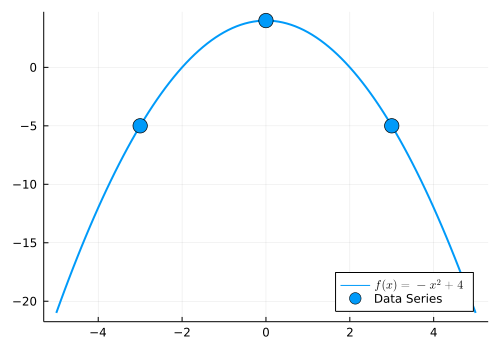

In [14]:
f = x-> -x^2 + 4
xx = -3:3:3
X = -5:0.1:5

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")

**Interpolation** refers to estimating a value within two known values that exist within a sequence of values.

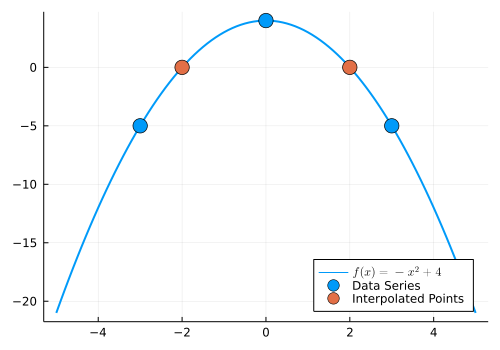

In [15]:
xi = -2:4:2

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")
scatter!(xi, f.(xi), ms=8, c=2, label="Interpolated Points")

**Extrapolation** refers to estimating an unknown value based on extending a known sequence of values or facts. 

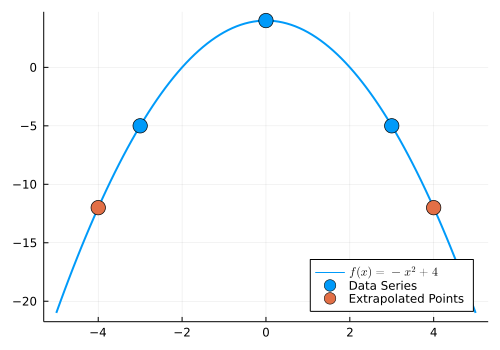

In [16]:
xe = -4:8:4

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")
scatter!(xe, f.(xe), ms=8, c=2, label="Extrapolated Points")

### What is the value of Extrapolation?

We can understand results beyond an observable region. 
Compared to interpolation, there is a greater risk of incurring errors.

### So what is Richardson Extrapolation?

Recall using Taylor Series we can create approximations such as the center difference formula with a step size $h$:

$$
    \frac{f(x+h) - f(x-h)}{2h} = f'(x) + O(h^2)
$$

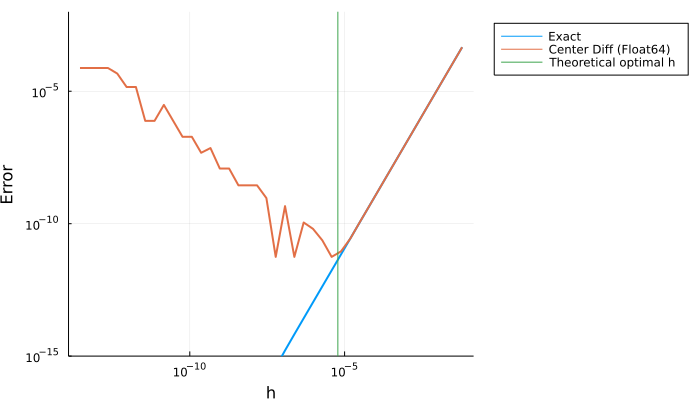

In [45]:
using Plots 

e64 = eps(Float64)
ctrl64 = cbrt(e64)
root5 = e64^(1/5)

hh = 0.5.^(4:45)
f = x -> cos(x); df = x -> - sin(x); x0 = pi/4 

df_approx = (x0, h) -> (f(x0+h) - f(x0-h))/(2*h)
df_ex = (x0, h) -> (f(big(x0+h)) - f(big(x0-h)))/(2*big(h))

err_ex = [ abs(df_ex(x0, h) - df(x0)) for h in hh ]
err_fl = [ abs(df_approx(x0, h) - df(x0)) for h in hh ]

plot(hh, err_ex, xaxis = :log, xlabel = "h", yaxis = :log, ylabel = "Error", lw = 2, label = "Exact", size = (700, 400), ylims = [1e-15, 1e-2], legend = :outertopright)
plot!(hh, err_fl, label = "Center Diff (Float64)", lw = 2)
vline!([ctrl64], label = "Theoretical optimal h")

Observe that the error reduces as h does, up until a point where rounding errors begin to dominate. 

We can see that there is a value in trying to approximate our function when $h \approx 0$, while avoiding the range with rounding error. 

This motivates **Richardson Extrapolation**: using the values of several approximations $A(h)$ to an exact function $A^*$, we can extrapolate $A(0)$, which provides a higher order estimation of $A^*$

## Richardson Extrapolation

A sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value

Consider, $A(h)$ an approximation of $A^*$ with step size $h$. Then,

$$A^* = A(h) + a_0h^{k_0} + a_1h^{k_1} + a_2h^{k_2} + \ldots$$

Where $a_i$, $k_i$ are constants and $h^{k_i} > h^{k_{i+1}}$

We can re-write

$$A^* = A(h) + a_0h^{k_0} + O(h^{k_1})$$

Consider two step sizes: $h$ and $\frac{h}{t}$, for some constant $t$. Then,

$$A^* = A(h) + a_0h^{k_0} + O(h^{k_1})$$
$$A^* = A(\frac{h}{t}) + a_0(\frac{h}{t})^{k_0} + O(h^{k_1})$$

With some algebra,

$$A^* (t^{k_0} - 1) = A(\frac{h}{t})t^{k_0} - A(h) + (t^{k_0} - 1)O(h^{k_1})$$

Finally,

$$ A^* = \frac{A(\frac{h}{t})t^{k_0} - A(h)}{(t^{k_0} - 1)} + O(h^{k_1})$$

Note that where we previously had an approximation of order $O(h^{k_0})$, but we've been able to augment that to $O(h^{k_1})$ using two step sizes.

Returning to the center difference formula, we have $k_0 =2$, $k_1 =4$. Select $t=2$ for simplicity. 

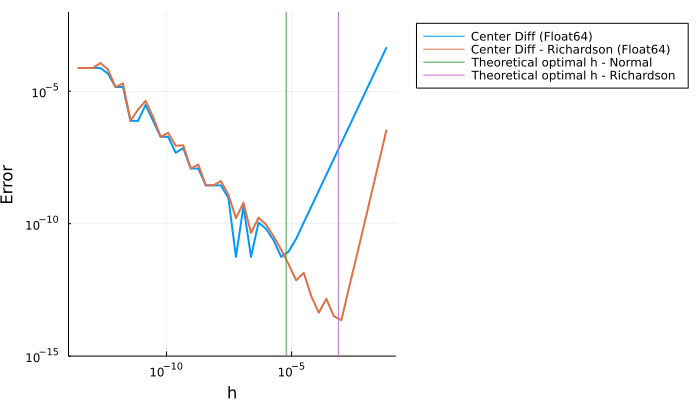

In [49]:
t = 2
k_0 = 2
df_ri = (x0, h) -> ( df_approx(x0, h/t)*t^k_0 - df_approx(x0, h) )/(t^k_0 - 1)

err_ex = [ abs(df_ex(x0, h) - df(x0)) for h in hh ]
err_fl = [ abs(df_approx(x0, h) - df(x0)) for h in hh ]
err_ri = [ abs(df_ri(x0, t*h) - df(x0)) for h in hh ]

plot(hh, err_fl, label = "Center Diff (Float64)", lw = 2, xaxis = :log, xlabel = "h", yaxis = :log, ylabel = "Error", size = (700, 400), ylims = [1e-15, 1e-2], legend = :outertopright)
plot!(hh, err_ri, label = "Center Diff - Richardson (Float64)", lw = 2)

vline!([ctrl64], label = "Theoretical optimal h - Normal")
vline!([root5], label = "Theoretical optimal h - Richardson")

Observe that we are able to acheive better error for a given $h$, as well as having a lower order truncation error

## Application:

### The Romberg Integration
which applies Richardson extrapolation to the trapezoid rule.

### The Bulirsch–Stoer Algorithm
for solving ordinary differential equations.

### The Romberg Integration Method

Apply Richardson extrapolation to the trapezoid rule to numerically approximate the definite integral $\int_a^b f(x)dx$ .

**Review of the trapezoid rule**

For step size $h=\frac{b-a}{N}$ :

$$
\begin{split}
 \int_a^b f(x)dx & \approx \sum_{k=1}^{N} \frac{1}{2}(x_k-x_{k-1}) \bigl( f(x_{k-1})+f(x_k) \bigr) \\
 & \approx \frac{h}{2} \Bigl[ f(a)+2 \sum_{k=1}^{N-1}f(a+kh) +f(b) \Bigr]
\end{split}
$$
$$
\text{where } a=x_0<x_1<\ldots<x_{N-1}<x_N<b
$$

With the truncation error term we have:
$$
I \approx T(h) + E(h) \approx T(h) + Ch^2
$$

**The Romberg method**

Using the trapezoid rule for step sizes $h_1$ and $h_2$ we get:
$$
I \approx T(h_1) + Ch_1^2 \approx T(h_2) + Ch_2^2 \tag{i}
$$

Solve for $C$:
$$
C \approx \frac{T(h_2)+T(h_1)}{h_1^2-h_2^2} \tag{ii}
$$

Plugging $(ii)$ back into $(i)$ we get:
$$
I \approx T(h_2) + \frac{T(h_2)-T(h_1)}{\bigl( \frac{h_1}{h_2} \bigr)^2 -1} \tag{iii}
$$

And the leading error has been changed from $O(h^2)$ to $O(h^4)$ .


If we let $h_2=\frac{1}{2}h_1$ we get:
$$
I \approx \frac{4T(h_2)-T(h_1)}{4-1} \tag{iv}
$$

Which can be written in the form of a Richardson extrapolation:
$$
R_{1,1} \approx \frac{4T_2-T_1}{4-1} + O(h^4) \tag{v}
$$


For the Romberg method, we apply this extrapolation $n$ times until the solution converges to $R_{n,n}$ .

\begin{alignat*}{7}
T_1=R_{0,0}\\
 & \searrow \\
T_2=R_{1,0} & \rightarrow & R_{1,1} \\
 & \searrow & & \searrow \\
T_3=R_{2,0} & \rightarrow & R_{2,1} & \rightarrow & R_{2,2} \\
\vdots & & \vdots & & \vdots & \ddots \\
T_{n-1}=R_{n,0} & \rightarrow & R_{n,1} & \rightarrow & R_{n,2} & \ldots & \ R_{n,n}
\end{alignat*}

Each iteration eliminates the leading error term from the previous approximation, getting the numerical result closer to the exact solution.

The general formula is:
$$
R_{n,m} = \frac{4^mR_{n,m-1} - R_{n-1,m-1}}{4^m-1} + O(h_n^{2m+2})
$$
where $n$ corresponds to the step size, and $m$ is the number of Richardson extrapolation iterations.

In [ ]:
# implement the same example Davis uses to explain the original method but use the Romberg.jl package instead




## Bulirsch-Stoer Method

It has been known as able to obtain high-accuracy solutions to ordinary differential equations with minimal computational effort.

### Assumptions
1. Function is smooth.
2. Function have no singular points inside the interval of integration.

If any vialation, turn to Runge-Kutta with adaptive step size method

### Three Big Ideas

1. Richardson’s deferred approach to the limit. (Already Discussed in Romberg integration)

2. The strength of rational function extrapolation in Richardson-type applications.

3. use a method whose error function is strictly even

### How does it work

1. Each singal Bulirsch-Stoer steps takes us from x to x + H, H is supposed to be quite large distance.

2. Then that single step is a grand leap consisting of many, dozens to hundreds) substeps of modified midpoint methods, which are then extrapolated to zero stepsize.

#### note: 
The number n of the substep used to be $$n = 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96 \dots n_j = 2n_{j-2}$$ as proposed by **Bulirsch and Stoer**. But more recent work by **Deuflhard** suggests that the sequence $$n = 2, 4, 6, \dots, n_j = 2j$$ is usually more efficient.

![Bulirsch-Stoer_Algorithm](Bulirsch-Stoer_Algorithm.png)

## Conclusion

#### ref

http://phys.uri.edu/nigh/NumRec/bookfpdf/f16-4.pdf